In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as ani 

In [2]:
import math
import cmath

In [3]:
ket_0 = np.array([1,0]) # |up>
ket_1 = np.array([0,1]) # |down>

c00 = np.outer(ket_0, ket_0)
c01 = np.outer(ket_0, ket_1)
c10 = np.outer(ket_1, ket_0)
c11 = np.outer(ket_1, ket_1)

In [4]:
def discrete_qw(N, coin, c_0):
    """Discrete time quantum walk with number of steps N, taking the coin operator C and the initial coin state. Returns a plot of the probabilities""" 
    
    P = 2*N+1 
    c, d = coin
    right = np.roll(np.eye(P), 1, axis=0)
    left = np.roll(np.eye(P), -1, axis=0)

    #S = np.kron(right, c00) + np.kron(left, c11)
    S = np.kron(left, c00) + np.kron(right, c11)
    U = S.dot(np.kron(np.eye(P), c))

    #initialising position and coin states 
    posn_0 = np.zeros(P)
    posn_0[N] = 1
    psi_0 = np.kron(posn_0, c_0)

    #evolution after N steps
    psi_N = np.linalg.matrix_power(U, N).dot(psi_0)

    #make measurement 
    probs = np.empty(P)
    for i in range(P):
        posn = np.zeros(P)
        posn[i] = 1

        M_i = np.kron(np.outer(posn, posn), np.eye(2))
        m = M_i.dot(psi_N)
        probs[i] = m.dot(m.conjugate()).real
    
    return np.arange(-N,N+1), probs

In [5]:
def hadamard_coin(): 
    d = 'Hadamard Coin'
    return (1/np.sqrt(2))*(c00 + c01 + c10 - c11), d

In [6]:
sym_coin_state = (1/np.sqrt(2))*(ket_0 + ket_1*1j) 

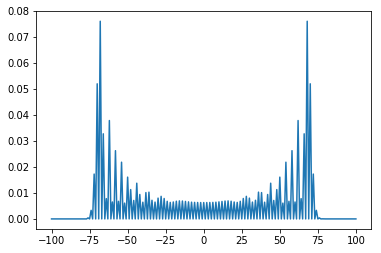

In [20]:
x,y = discrete_qw(100, hadamard_coin(), sym_coin_state)
plt.plot(x,y)

MovieWriter mencoder unavailable.


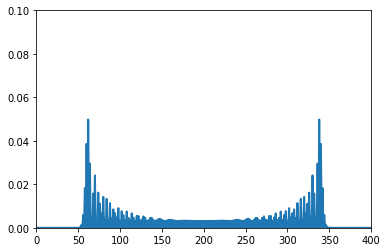

In [23]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 400), ylim=(0, 0.1))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x,y = discrete_qw(i, hadamard_coin(), sym_coin_state)
    line.set_data(x, y)
    return line,

anim = ani.FuncAnimation(fig, animate, init_func=init, frames=range(10,201,10), interval=400, blit=True)
anim.save('hadamard_coin.gif', writer='mencoder')

MovieWriter mencoder unavailable.


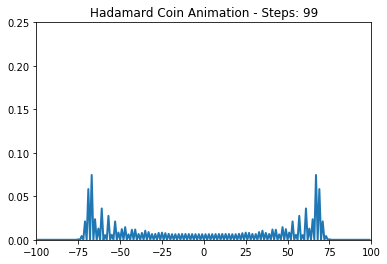

In [8]:
fig = plt.figure()
ax = plt.axes(xlim=(-100, 100), ylim=(0, 0.25))
line, = ax.plot([], [], lw=2)

y_lims = np.arange(0.25, 0.1, -0.0015)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x,y = discrete_qw(i, hadamard_coin(), sym_coin_state)
    line.set_data(x, y)
    #ax.set_ylim(0, y_lims[i])
    plt.title('Hadamard Coin Animation - Steps: ' + str(i))
    return line,

anim = ani.FuncAnimation(fig, animate, init_func=init, frames=range(0,100,1), interval=75, blit=True)
anim.save('hadamard_coin_midaxis.gif', writer='mencoder')